## Introduction

For our project, we were tasked with using datasets from the Western Pennsylvania Regional Data Center in order to come up with a "best neighborhood" via a matric of our choosing. After discussing, we decided to focus on the saftey of each neighborhood, as we all agreed that it is important to live in a safe neighborhood. We considered doing other metrics such as quality of education and acccess to food, but ended up going with saftey as the main metric to focus on, as much of the datasets on the WPRDC are directly related to saftey.

## The Metrics

### Metric 1: Arrest Rates

In order to measure saftey, one metric that we can look at is the arrest data and how frequent arrests are in each neighborhood. Generally a neighborhood with lower arrest rates would be safer. From the Western Pennsylvania Regional Data Center, we can use both the arrest data dataset provided by the Pittsburgh police and the 2020 census dataset provided by the 2020 census for the neighborhood populations.

To fairly measure this metric, we need both the arrest data and the population data in order to look at the rate of crime rather than just the raw arrest numbers. That way, neighborhoods can be compared relatively, and we won't have a scenario where all the best neighborhoods are just the smallest and all the worst ones are the largest, as they would have lower and higher arrest rates respectively.

First, we will import all the necessary libraries in order to read, manipulate and display the data. Then we will read both of the datasets into corresponding data frames.

In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# read in arrest data
arr = pd.read_csv("ArrestsDataset.csv", sep=",")
#read in population data
pop = pd.read_csv("NeighborhoodPopulation.csv", sep=",")

Next, we will create a 2 dictionaries. One for a neighborhood-population realtion and one for a neighborhood-number of offenses relation. For each of them, we will itterate through the corresponding dataframe and populate the dictionary with the neighborhood as the key. The value pair for population is the 2020 total population for that neighborhood, and for arrests we just incriment that neighborhood by one in order to increase the count of arrests.



In [2]:
#define dict for populations
population = {}
#iterate and assign population to each neighborhood
for index,row in pop.iterrows():
    population[row["Neighborhood"]] = row["2020_Total_Population"]
    
#define dict for offenses
offenses =  defaultdict(int)
#iterate and assign # of offenses to each neighborhood
for index,row in arr.iterrows():
    offenses[row["INCIDENTNEIGHBORHOOD"]] += 1

Next we will define a set of neighborhoods that are contained within our population dataset that aren't contained in our arrest dataset. This is to ensure that we only look at neighborhoods that we have a well defined population for, and don't try to access something that doesn't exist within the arrest dataset.

In [3]:
#create sets of neighborhoods
arr_neighborhoods = set(arr['INCIDENTNEIGHBORHOOD'])
pop_neighborhoods = set(pop['Neighborhood'])
#get missing neighborhoods by set difference
missing_neighborhoods = pop_neighborhoods - arr_neighborhoods

Now that we fully prepared our two datasets, we can create a crimerate dictionary to map the crimerate relative to population to each neighborhood. We will then sort that into a list.

In [4]:
#make crimerate dict
crimerate = {}
#iterate through population
for key in population:
    #make sure we are only accessing neighborhoods in both datasets
    if key not in (missing_neighborhoods):
        #calculate crime rate for each neighborhood
        crimerate[key] = offenses[key] / population[key]

#sort by crimerate
sorted_crimerate = sorted(crimerate.items(), key=lambda x: x[1])

Looking into the crime rate of each neighborhood, we want to make sure that we're getting values that make sense. The only values that don't make sense are the ones with the highest arrest rates, much higher than 1 arrest per person, which is unrealistic. This could be due to a variety of reasons, the recency of the arrest data, the way neighborhood regions are divided beween datasets, small populations in neighborhoods or more. Luckily, that is only true of the neighborhoods with the highest arrest rate, which we are not interested in. We will avoid this by examaning only the top contendors later.

In [5]:
for key, value in sorted_crimerate:
    print(f"Neighborhood: {key}, Crime Rate: {value}", "pop: ", population[key])

Neighborhood: Central Northside, Crime Rate: 0.007738896366083445 pop:  2972
Neighborhood: Squirrel Hill North, Crime Rate: 0.023907736341442883 pop:  11879
Neighborhood: Swisshelm Park, Crime Rate: 0.03136669156086632 pop:  1339
Neighborhood: Regent Square, Crime Rate: 0.037075180226570546 pop:  971
Neighborhood: North Oakland, Crime Rate: 0.040501356280984 pop:  10691
Neighborhood: New Homestead, Crime Rate: 0.04252998909487459 pop:  917
Neighborhood: Stanton Heights, Crime Rate: 0.04946916647842783 pop:  4427
Neighborhood: Squirrel Hill South, Crime Rate: 0.05275184435594438 pop:  15317
Neighborhood: Point Breeze, Crime Rate: 0.055534779356768885 pop:  5348
Neighborhood: Morningside, Crime Rate: 0.05688806888068881 pop:  3252
Neighborhood: Shadyside, Crime Rate: 0.06163086766338056 pop:  15317
Neighborhood: Westwood, Crime Rate: 0.0666266506602641 pop:  3332
Neighborhood: Banksville, Crime Rate: 0.06978434698328083 pop:  4127
Neighborhood: Lincoln Place, Crime Rate: 0.07036450079239

Now, we will create a dataframe using our sorted crimerate list, with a coulmn for neighborhood name and one for the crime rate we jusr calculated. At the same time, we will make another dataframe of the 10 neighborhoods with the lowest crimerate for easier visualization.

In [6]:
#make crimerate dataframe
crimerate_df = pd.DataFrame(sorted_crimerate, columns=['Neighborhood', 'Crime Rate'])
#make top 10 neighborhoods by crimerate dataframe
top_10_neighborhoods = crimerate_df.sort_values(by='Crime Rate', ascending=True).head(10)

Now we will vizualize the results of our data exploration using matplotlib. Looking at all of the neighborhoods at once is overwhelming, as the outlier data mentioned above makes the data hard to see, so we can cut off the last 30 neighborhoods to get a feel for the bulk of the data, and see those neighborhood's names easier.

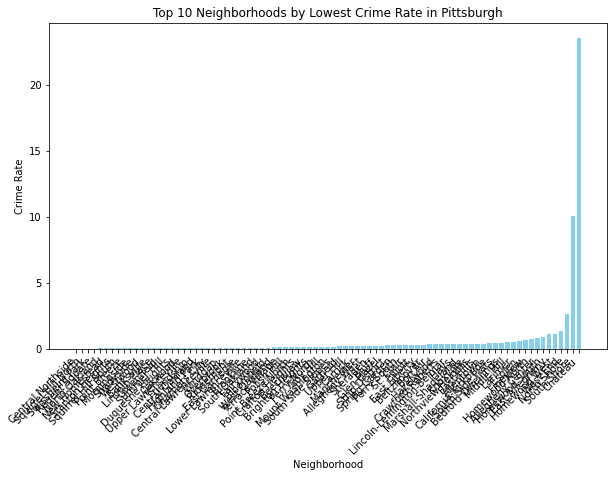

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(crimerate_df['Neighborhood'], crimerate_df['Crime Rate'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Top 10 Neighborhoods by Lowest Crime Rate in Pittsburgh')
plt.xticks(rotation=45, ha='right')
plt.show()

Cutting off the bottom 30 lets us see that most neighborhoods lie below 30%

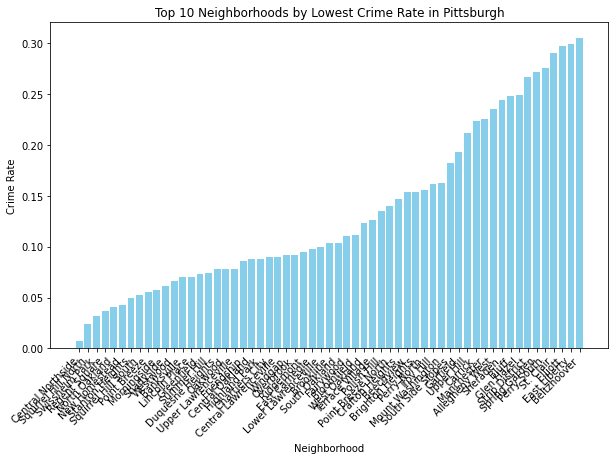

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(crimerate_df.head(59)['Neighborhood'], crimerate_df.head(59)['Crime Rate'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Top 10 Neighborhoods by Lowest Crime Rate in Pittsburgh')
plt.xticks(rotation=45, ha='right')
plt.show()

Now let's just look at the top 10 neighborhoods


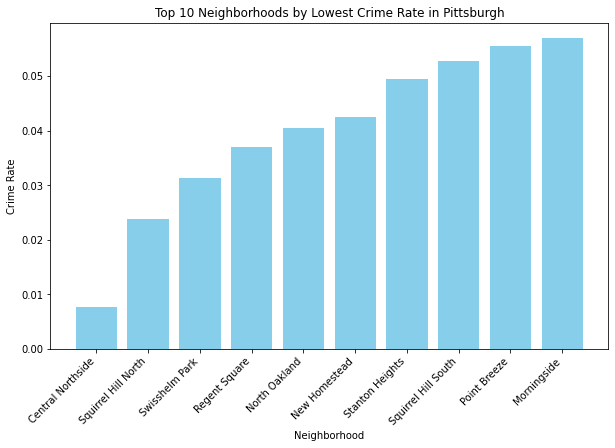

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['Neighborhood'], top_10_neighborhoods['Crime Rate'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')
plt.title('Top 10 Neighborhoods by Lowest Crime Rate in Pittsburgh')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see from the bar graph that the neighborhood that has the lowest number of arrests proportional to the population of the neighborhood is Central Northside.  The top 5 from our analysis is as follows:
1)Central Northside
2)Squirell Hill North
3)Swisshelm Park
4)Regent Square
5)North Oakland

I definitely did not expect Central Northside to be the best neighborhood by arrest rate, but given that they contain the Mexican War steets, a historical district with high property value I should have seen it coming. Most of the higher ranked neighborhoods have a high population, so this portion of the results should be fairly accurate. The Mexican War streets is one of my favorite neighborhoods in Pittsburgh, so seeing it high didn't suprise me despite not expecting it to be number one. I expected neighborhoods like squirrel hill to be high, but was suprised to see swisshelm park so high up as well.

# Section 2 - Analysis of Fires in the Pittsburgh Area

In [10]:
#Setting up imports
import pandas as pd
import geopandas
%matplotlib inline

#Read in my dataset, Fire_Incidents
fire_incidents = pd.read_csv("Fire_Analysis/Fire_Incidents.csv")

#Get a series of the addresses of the fire incidents. I named it cities as I plan to filter out the city names
cities = fire_incidents["address"]

#City names are present after the comma in the address, so I split the address the comma,
#grabbed the second section, and then split by space and grabbed the second section
for i in range(len(cities)):
    city = (cities.iloc[i]).split(",")[1]
    city = city.split(" ")[1]
    cities.at[i] = city
    
#counts unique call numbers in each neighborhood
neighborhood_fires = fire_incidents.groupby('neighborhood').nunique()['call_no']

#Read in the Neighborhoods_.shp file. This was used in a lab lesson and allows me to plot the map of the neighborhoods
neighborhoods = geopandas.read_file("Fire_Analysis/Neighborhoods/Neighborhoods_.shp") # read in the shapefile

In [11]:
#Time to merge number of fires with neighborhoods
fires_map = neighborhoods.merge(neighborhood_fires, how='left', left_on='hood', right_on='neighborhood')

## Map of Neighborhood Fire Incidents

Below, each neighborhood is pictured along with color intensities corresponding to how many fire incidents occured in said neighborhood.

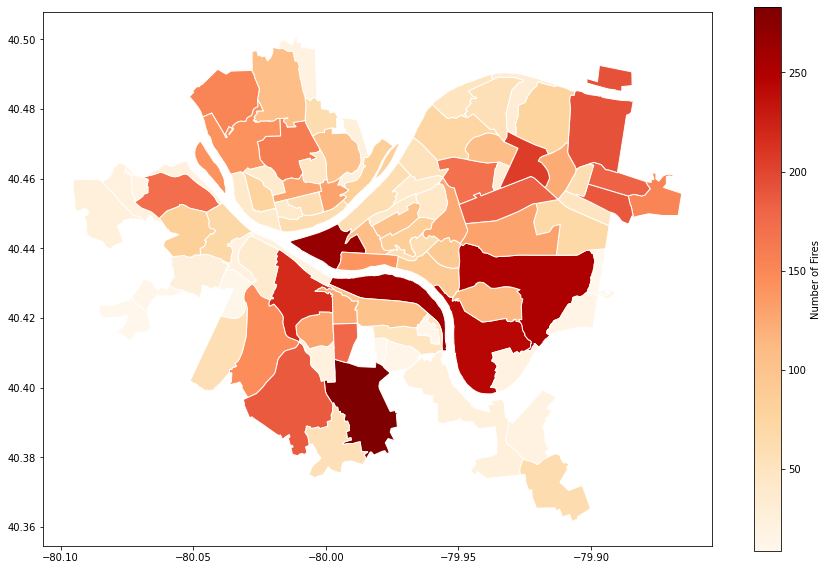

In [12]:
fires_map.plot(column='call_no',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10)
              )

In [13]:
#least_neighborhoods = the 20 neighborhoods with the lowest number of fire incidents
least_neighborhoods = neighborhood_fires.sort_values().head(20)

#plot of 20 safest neighborhoods
least_fires_map = neighborhoods.merge(least_neighborhoods, how='left', left_on='hood', right_on='neighborhood')

#List the 20 safest neighborhoods
print(least_neighborhoods)

neighborhood
Mount Oliver Borough     6
Regent Square            9
Mt. Oliver              11
East Carnegie           11
Ridgemont               12
Oakwood                 13
St. Clair               13
Arlington Heights       13
Swisshelm Park          16
Chartiers City          17
Glen Hazel              20
Summer Hill             21
New Homestead           21
West End                22
Esplen                  22
Bon Air                 22
South Shore             23
Windgap                 23
Hays                    24
Spring Garden           24
Name: call_no, dtype: int64


## Map of 20 Neighborhoods (Lowest # of Incidents) Below

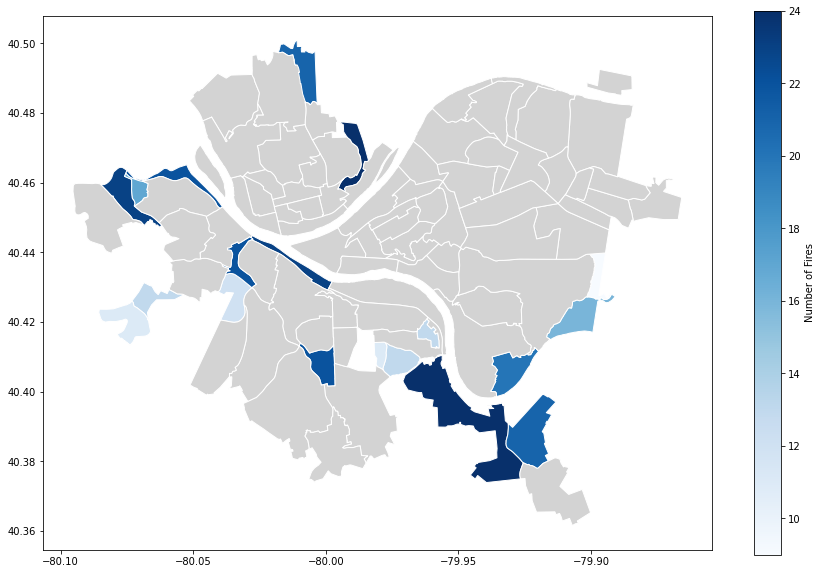

In [14]:
least_fires_map.plot(column='call_no',
               cmap='Blues',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10),
               missing_kwds={"color" : "lightgrey"}
              )

# Now Considering Population - Part 2

I thought it would be a good idea to factor in population, which is something some of my other group members did as well. I then took the population for each location and divided that by the number of fire incidents in each neighborhood to get a value for the number of people in a neighborhood per fire incident. For example, a neighborhood could have 1 fire for every 300 people in its population.

In [15]:
#Next, consider population in fire map
neighborhood_population = pd.read_csv("NeighborhoodPopulation.csv")

#Fix some of the mismatched neighborhood names
neighborhood_population.at[15, "Neighborhood"] = "Central Business District"
neighborhood_population.at[73, "Neighborhood"] = "Spring Hill-City View"

# Arlington and Arlington Heights were grouped in the neighborhood population data set. When quickly looking at the combined ratio, 
# they would not place in the top places whatsoever, so they were not adjusted here

import numpy as np

#Now diving number of population by number of fires
for i in range(len(neighborhood_population["Neighborhood"])):
    if (np.isin(neighborhood_population.at[i, "Neighborhood"], fire_incidents["neighborhood"].unique() )):
        neighborhood_name = neighborhood_population.at[i, "Neighborhood"]
        neighborhood_pop = neighborhood_population.at[i, "2010_Total_Population"]
        fires_map_index = fires_map[fires_map["hood"]==neighborhood_name].index[0]
        
        fires_map.at[fires_map_index, "call_no"] = neighborhood_pop / fires_map.at[fires_map_index, "call_no"]
print(fires_map["call_no"].sort_values())

62      0.268293
53      0.826087
44      4.734375
4      10.098361
54     11.000000
         ...    
35     85.062500
64     87.407692
67    103.111111
42    104.562500
10    113.555556
Name: call_no, Length: 90, dtype: float64


## Map of People Per Fire (Higher is Better)

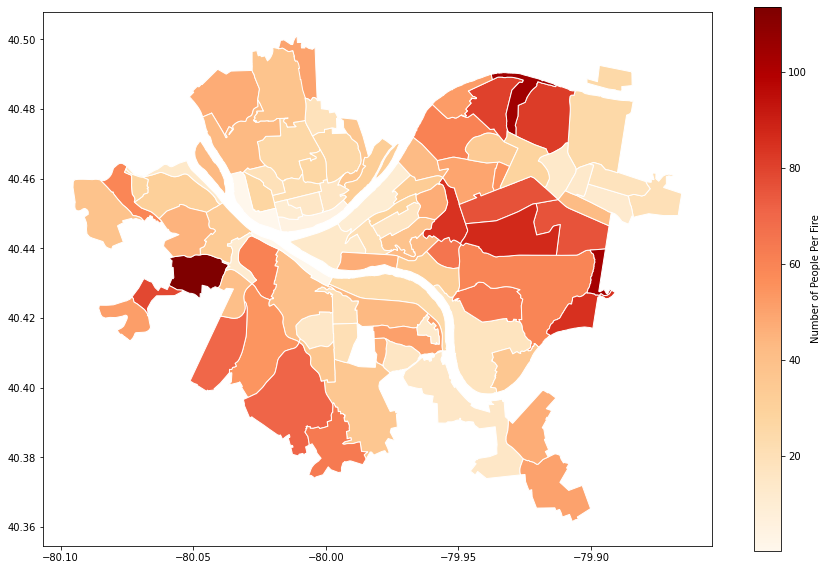

In [16]:
fires_map.plot(column='call_no',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of People Per Fire"},
               figsize=(15,10)
              )

In [17]:
#This copy allows a second dataframe to be created/manipulated
least_fires_map = fires_map.copy(deep=True)

#Sort by fires per people descending. Everything after the first 20 are filled in with NaN values.
#This allows the rest of the cities to show up as grey
least_fires_map.sort_values(by="call_no", inplace=True, ignore_index=True, ascending=False)
least_fires_map.loc[20:, "call_no"] = np.NaN

#Check that NaN worked
print(least_fires_map["call_no"].head(25))

0     113.555556
1     104.562500
2     103.111111
3      87.407692
4      85.062500
5      84.408000
6      81.987179
7      80.719298
8      79.000000
9      76.038251
10     75.928571
11     70.663102
12     70.237288
13     65.440860
14     63.982456
15     63.929825
16     60.625000
17     60.567568
18     59.960317
19     59.521739
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
Name: call_no, dtype: float64


## Map of Top 20 Safest Neighborhoods (Higher is Better)

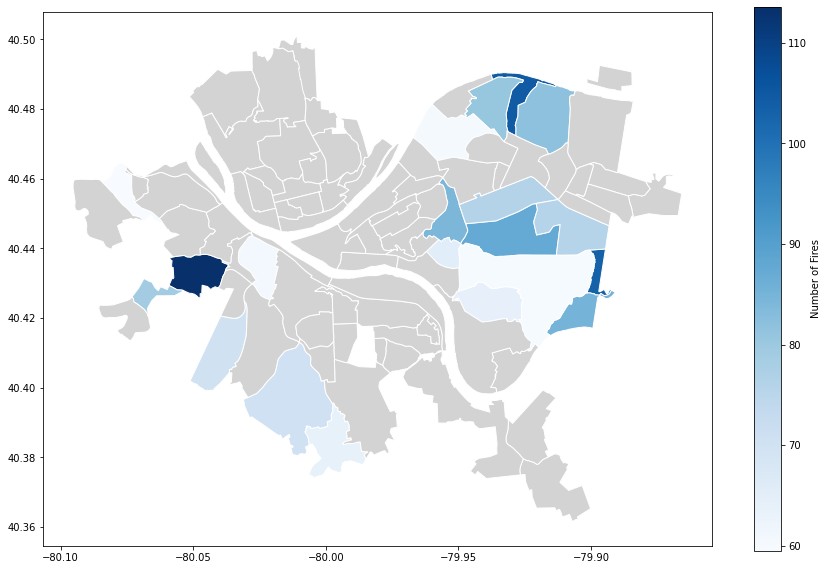

In [18]:
#plot of 20 safest neighborhoods with population factored in
least_fires_map.plot(column='call_no',
               cmap='Blues',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Fires"},
               figsize=(15,10),
               missing_kwds={"color" : "lightgrey"}
              )

# Now Looking at some bar plots

hood
Chateau                  0.268293
South Shore              0.826087
North Shore              4.734375
Strip District          10.098361
Allegheny West          11.000000
                          ...    
Swisshelm Park          85.062500
Squirrel Hill North     87.407692
Regent Square          103.111111
Morningside            104.562500
Westwood               113.555556
Name: call_no, Length: 90, dtype: float64


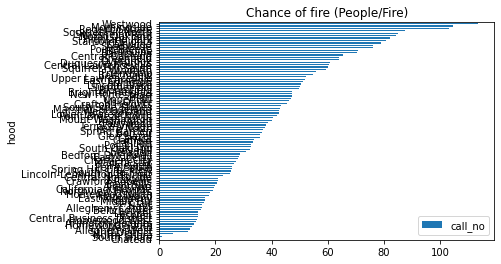

In [19]:
fires_map.index = fires_map["hood"]
fires_map.sort_values(by="call_no", inplace=True)
fires_map[["call_no", "hood"]].plot(kind="barh", title="Chance of fire (People/Fire)")
print(fires_map["call_no"])

## Narrowing in on the top 20 neighborhoods, we can get a good view of the safest neighborhoods by fire incident

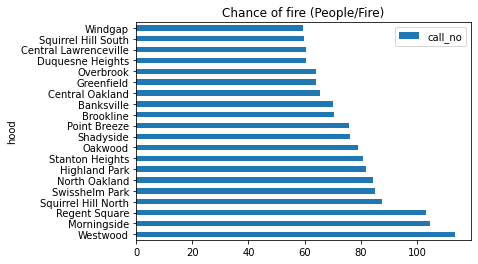

In [20]:
least_fires_map.dropna(inplace=True)
least_fires_map.index = least_fires_map["hood"]
least_fires_map[["call_no", "hood"]].plot(kind="barh", title="Chance of fire (People/Fire)")

# In terms of a chance of fire below are the five best options
1. Westwood with 114 people per fire
2. Morningside with 105 people per fire
3. Regent Square with 103 people per fire
4. Squirrel Hill North with 87 people per fire
5. **Swisshelm Park** with 85 people per fire

## Evan's section

## Non-traffic violation
This dataset shows the incidents that happen in different neighborhoods. I basically measure which neighborhood has the most and least incident and the average age of some neighborhoods that happens incidents the most. I will also list some offenses that happen the most.

In [21]:
import pandas as pd

In [22]:
violation=pd.read_csv("Violations_Analysis/non-traffic.csv")

In [23]:
violation.head(5)

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403


In [24]:
#remove the unnecessary data
violation.drop(columns=['_id','PK','CCR','CITEDTIME','INCIDENTLOCATION','ZONE','INCIDENTTRACT',
                        'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X','Y'])

,GENDER,RACE,AGE,OFFENSES,NEIGHBORHOOD
0,M,B,29.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland
1,M,W,21.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland
2,NaN,NaN,NaN,5505 Public Drunkenness,Allegheny Center
3,M,B,22.0,"6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South
4,F,W,22.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville
...,...,...,...,...,...
15636,M,B,41.0,601.08 (a) Open Container Law,NaN
15637,M,B,33.0,601.16(b)(1)(a) Any Person who urinates or def...,NaN
15638,M,B,33.0,5505 Public Drunkenness,NaN
15639,M,B,33.0,5503(a)(3) DISORDERLY CONDUCT - OBSCENE LANG/GEST,NaN


---

In [25]:
#each neighborhood incidents
violation['NEIGHBORHOOD'].value_counts()

South Side Flats             3397
Central Business District    1995
Central Oakland               659
North Shore                   576
Carrick                       441
                             ... 
St. Clair                       3
Chartiers City                  3
Outside State                   2
Mt. Oliver Boro                 2
Outside County                  2
Name: NEIGHBORHOOD, Length: 97, dtype: int64

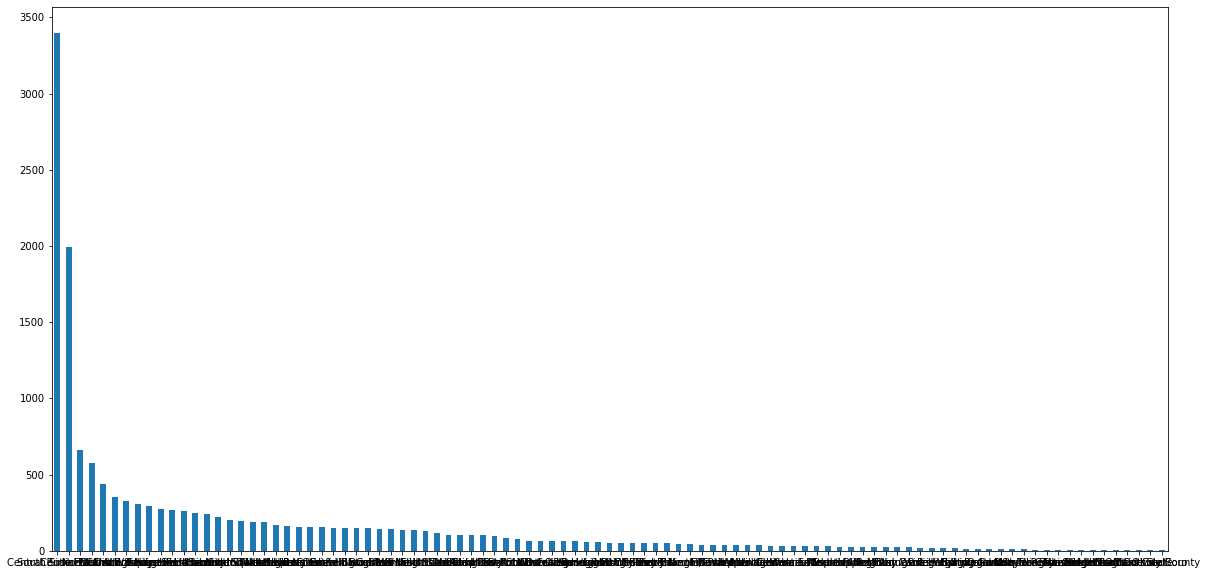

In [26]:
violation['NEIGHBORHOOD'].value_counts().plot(kind='bar', rot=0, figsize=(20,10));

In [27]:
#the top10 neighborhood has the most incident
violation['NEIGHBORHOOD'].value_counts().head(10)

South Side Flats             3397
Central Business District    1995
Central Oakland               659
North Shore                   576
Carrick                       441
East Allegheny                355
Mount Washington              327
Brookline                     310
Shadyside                     297
Hazelwood                     277
Name: NEIGHBORHOOD, dtype: int64

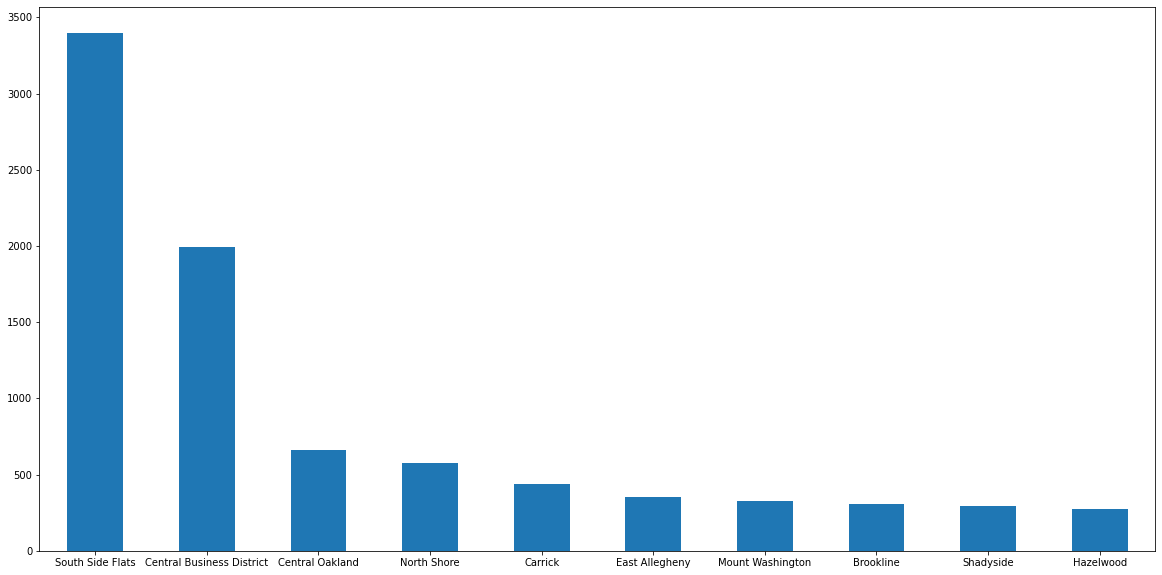

In [28]:
violation['NEIGHBORHOOD'].value_counts().head(10).plot(kind='bar', rot=0, figsize=(20,10));

In [29]:
#the top10 neighborhood has the least incident
violation['NEIGHBORHOOD'].value_counts().tail(10)

Arlington Heights          7
Summer Hill                7
Swisshelm Park             6
Ridgemont                  4
Mt. Oliver Neighborhood    4
St. Clair                  3
Chartiers City             3
Outside State              2
Mt. Oliver Boro            2
Outside County             2
Name: NEIGHBORHOOD, dtype: int64

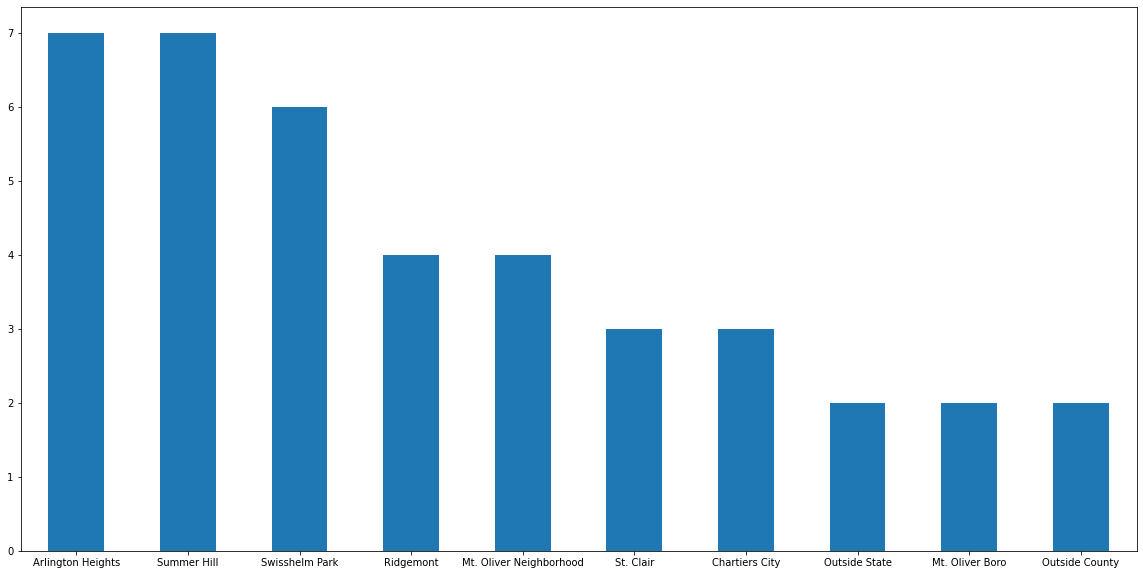

In [30]:
violation['NEIGHBORHOOD'].value_counts().tail(10).plot(kind='bar', rot=0, figsize=(20,10));

---

In [31]:
#aveage age 
violation['AGE'].mean()

33.02735855115279

In [32]:
query_mask = violation['NEIGHBORHOOD']== "South Side Flats"
south=violation[query_mask]
south['AGE'].mean()

27.606203840472674

In [33]:
query_mask2 = violation['NEIGHBORHOOD']== "Central Business District"
central=violation[query_mask2]
central['AGE'].mean()

38.73104145601618

In [34]:
query_mask3 = violation['NEIGHBORHOOD']== "Central Oakland"
centralO=violation[query_mask3]
centralO['AGE'].mean()

23.65045592705167

In [35]:
query_mask4 = violation['NEIGHBORHOOD']== "North Shore"
north=violation[query_mask4]
north['AGE'].mean()

30.852430555555557

In [36]:
age = [['All neighborhood', 33.027],['South Side Flats', 27.606],['Central Business District', 38.731], 
       ['Central Oakland', 23.650], ['North Shore', 30.852]]
df=pd.DataFrame(age, columns=['neighborhood','mean value'])
df

,neighborhood,mean value
0,All neighborhood,33.027
1,South Side Flats,27.606
2,Central Business District,38.731
3,Central Oakland,23.650
4,North Shore,30.852


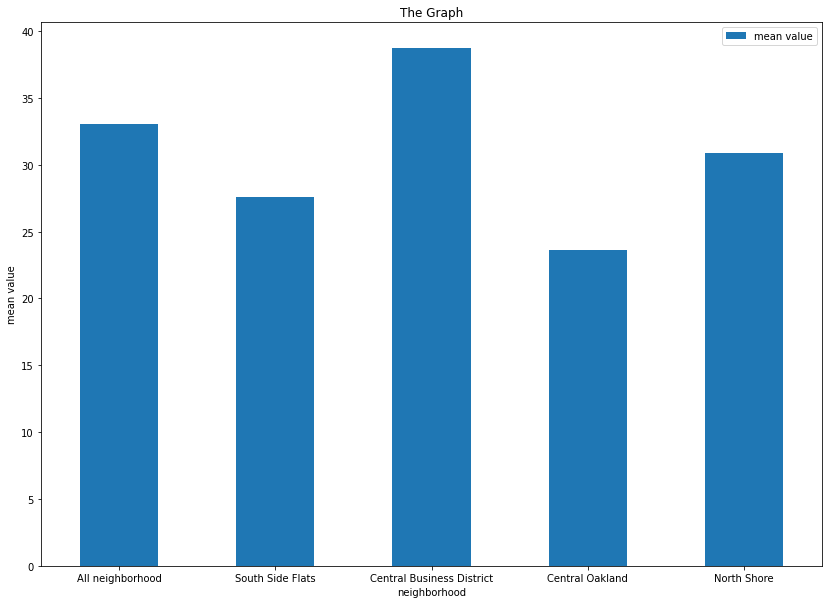

In [37]:
df.plot.bar(x='neighborhood', y='mean value', xlabel='neighborhood', ylabel='mean value', title='The Graph', 
            rot=0, figsize=(14,10));

---

In [38]:
violation['OFFENSES'].value_counts().head(5)

5505 Public Drunkenness                                                                   3081
2709(a)(1) Harassment by Physical Contact, or Attempts or Threats                         1519
627.02(b)(i) Possessing a small amount of marijuana                                       1262
5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGHTING                                        1260
601.16(b)(1)(a) Any Person who urinates or defecates in, on, or about any public place    1254
Name: OFFENSES, dtype: int64

#### Top 5 offenses:
* Public Drunkeness
* Harassment by Physical Contact
* Possessing a small amount of marijuana
* Engage in fighting
* Urination and defecation in any public place

In [39]:
top = [['Public Drunkness', 3081],['Harassment by physical contact', 1519],['Possessing marijuana', 1262], 
       ['Engaging in fighting', 1260], ['Urination and defecation in public', 1254]]
df2=pd.DataFrame(top, columns=['violation','count'])
df2

,violation,count
0,Public Drunkness,3081
1,Harassment by physical contact,1519
2,Possessing marijuana,1262
3,Engaging in fighting,1260
4,Urination and defecation in public,1254


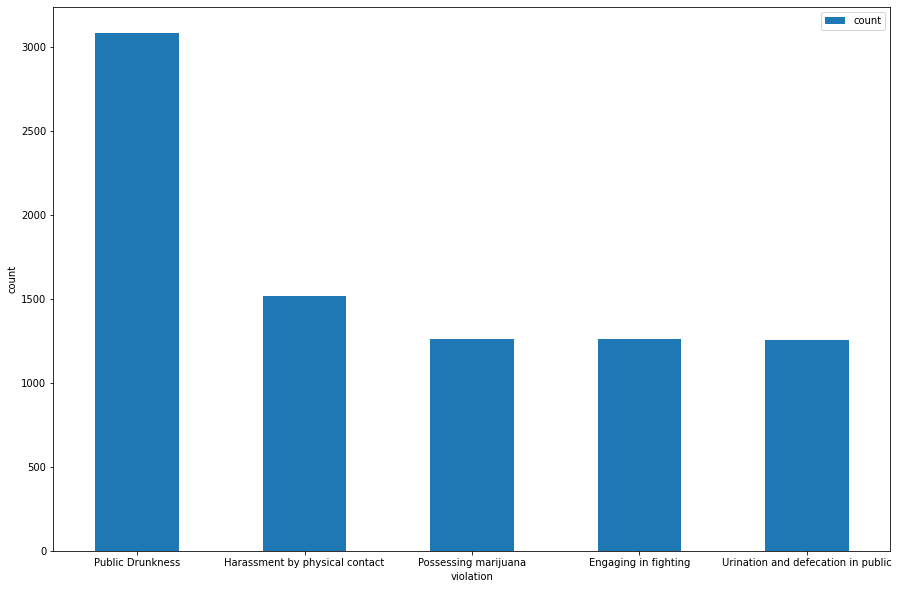

In [40]:
df2.plot.bar(x='violation', y='count', xlabel='violation', ylabel='count', rot=0, figsize=(15,10))

---

### Best Neighborhood: Mt.Oliver Boro

### Conclusion:
The reason I choose Mt.Oliver Boro as the best neighborhood is simply because it has the least incidents out of 97 neighborhoods. By the analysis, it's likely assuming that the fewer younger people the neighborhood has, the fewer incidents would happen. The most offensive is public drunkness, so the neighborhood has fewer bars and nightlife will also likely be more peaceful.


### Conclusion: Marlon Lugo
The neighborhood we identified as safest and therefor best, Swisshelm park, did suprise me. Given that I grew up in Pittsburgh, I was aware of swisshelm park but I never would have guessed it as the best neighborhood. Most of the other high ranked neighborhoods in my metric (arrest rates) I expected, like the Mexican War streets and Squirrel Hill. I think smaller neighborhoods tend to be favored especially in the case of a negative metric, like the ones that we chose.
